In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_data.target

### Data Analysis and Exploration

In [3]:
# Display basic information about the dataset
print("Basic information about the Breast Cancer Wisconsin dataset:")
print(breast_cancer_df.info())

Basic information about the Breast Cancer Wisconsin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error         

In [4]:
# Display summary statistics
print("\nSummary statistics of the Breast Cancer Wisconsin dataset:")
print(breast_cancer_df.describe())


Summary statistics of the Breast Cancer Wisconsin dataset:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630        

In [5]:
# Check for missing values
print("\nMissing values in the Breast Cancer Wisconsin dataset:")
print(breast_cancer_df.isnull().sum())


Missing values in the Breast Cancer Wisconsin dataset:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


### Data Visualization

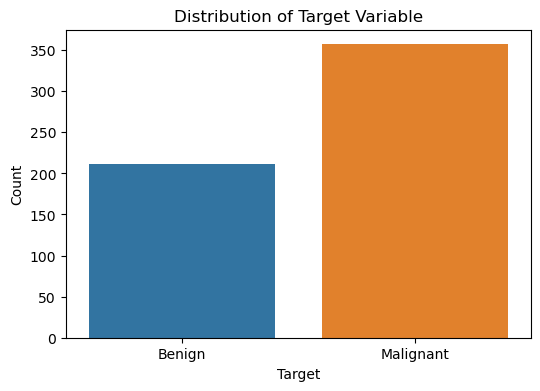

In [6]:
# Visualize the distribution of target variable 'target'
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=breast_cancer_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

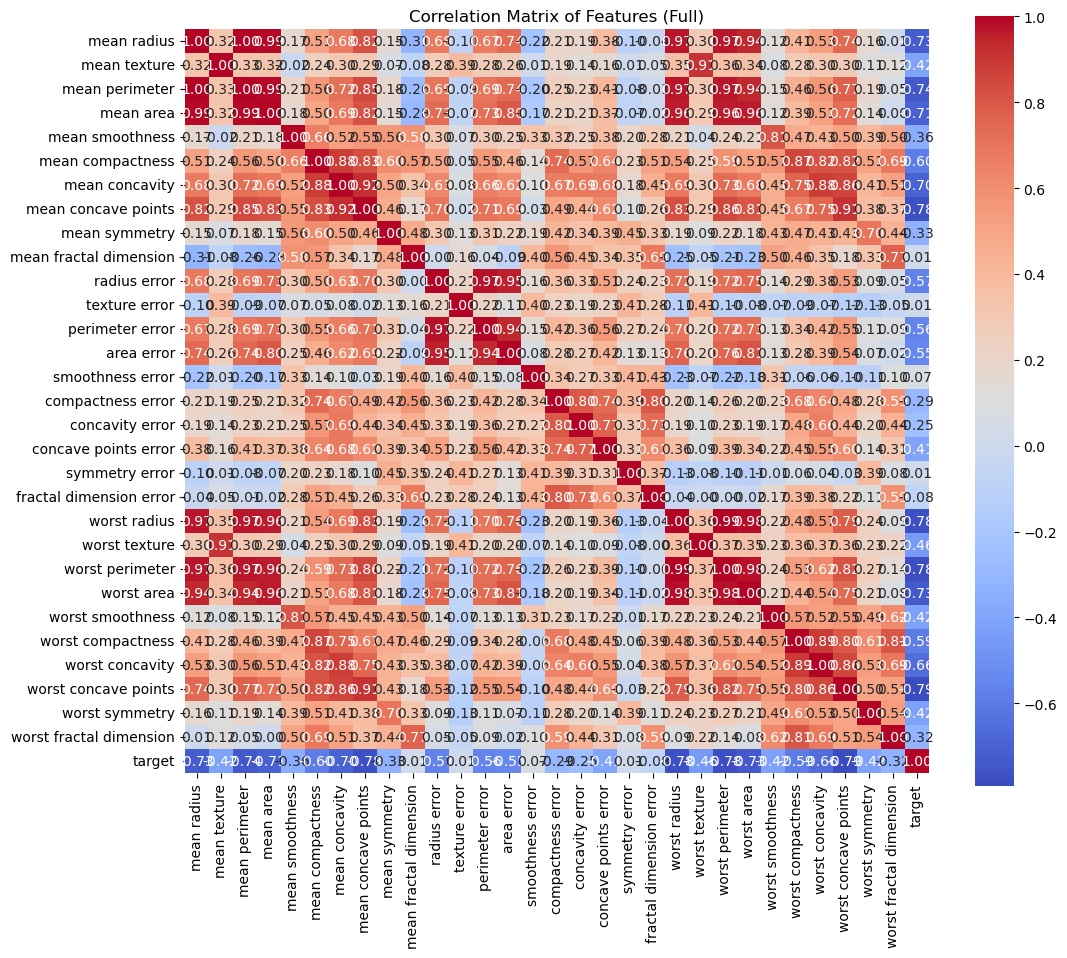

In [7]:
# Visualize correlation between features using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(breast_cancer_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Features (Full)')
plt.show()

In [8]:
# Select important features based on correlation with target variable
important_features = breast_cancer_df.corr()['target'][abs(breast_cancer_df.corr()['target']) > 0.5].index.tolist()

# Create a new dataframe with only important features
important_df = breast_cancer_df[important_features]

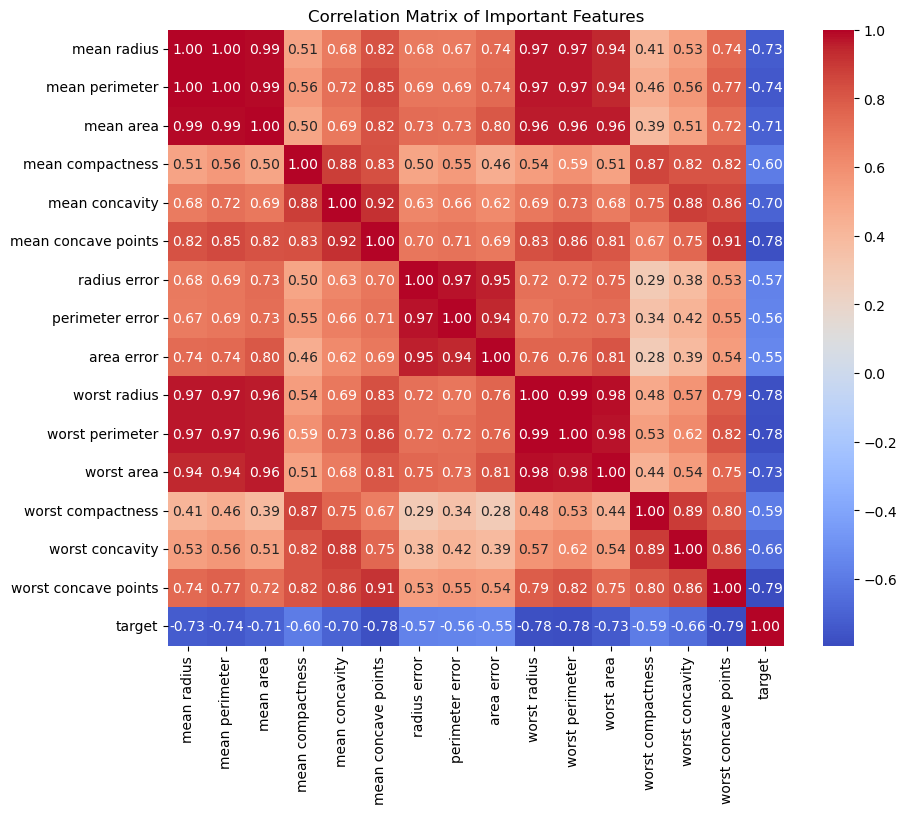

In [9]:
# Visualize correlation between important features using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(important_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Important Features')
plt.show()

### Data Preprocessing

In [10]:
# Split the data into features (X) and target variable (y)
X = breast_cancer_df.drop('target', axis=1)
y = breast_cancer_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [11]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

In [13]:
# Print model accuracy
print(f'\nModel Accuracy: {accuracy:.2f}')


Model Accuracy: 0.96


In [14]:
# Print Classification Report
print('\nClassification Report:\n', classification_report_result)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [15]:
# Print Confusion Matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix_result, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])
print('\nConfusion Matrix:\n', confusion_matrix_df)


Confusion Matrix:
                   Predicted Benign  Predicted Malignant
Actual Benign                   40                    3
Actual Malignant                 1                   70
